# Homework 1: Setup & Rounding Error
Physics 177, Spring 2017  (Prof. Tanedo)  
**Due**: Tuesday, April 18

Sergio Garcia


## Discussion

Feel free to use whatever resources you need to get up to speed with the tools (Python, Jupyter, GitHub). You are encouraged to work with other students, especially for technical set up. Please note the following:
* While you are free to discuss the problems, every line of code you type should be your own and *not* copied-and-pasted from anyone else. You should write your code without referring to anyone else.
* We will penalize plagiarism harshly.


## 1. Getting Set Up

Set up **Python** on your system. Version 3.6 is preferred, but we shouldn't have any major problems if you're using an earlier 3.x version or 2.7.

You are also responsible for setting up the **Jupyter** notebook (formerly iPython) environment. 

Sign up for a free **GitHub** account. The account should be associated with your UCR e-mail address. (You may also use an existing account.) All work for this course will be completed in Jupyter notebooks and submitted to GitHub. 
- I strongly suggest that you use a professional username. Your GitHub account is a de-facto resume/CV when you apply for jobs (both academic and industry).
- I also suggest uploading a photo to help us learn your names.

**Important**: send an e-mail to Prof. Tanedo and Corey Kownacki (TA). The subject of the e-mail should be *P177: Homework 1* and you should clearly indicate your GitHub username and the URL to your GitHub account. 


## 2. Cloning this notebook

Homework, like this one, will be posted to the course GitHub:  
https://github.com/orgs/Physics177-2017/  

For those already familiar with GitHub, you can go ahead and fork a copy of this notebook. The instructions below are the "round-about" way of doing things.

1. Download ("clone") this notebook to your own computer.

2. Open your local copy of this notebook.

3. Go to the top cell of this notebook and replace "**Your Name**" with your actual name. *Remark*: the anime film *Your Name* was recently released in US theaters. As of this writing, it has a 79% score on Metacritic.

4. Save this notebook

5. Create a new repository on GitHub called **P177_Homework01**. Initialize it with a **README.md** file, where you can briefly explain that this is Homework 1. Feel free to add any other comments in the README that you think are appropriate.

6. Upload your local copy of this notebook to this repository. Be sure to write a brief note under **Commit changes**. Say something like "initial upload."

7. Make sure that the copy of your homework in your repository actually has your name on top. If not, troubleshoot.

## 3. Markdown Practice

For this problem, I'd like you **create a markdown cell** just below this one and explore the markdown syntax. Use *Insert* > *Insert Cell Below* from this cell.

Here's one useful reference:
https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

I'd like you to include the following in this new cell:
1. Create a subheading (using two hashtags) 
2. Create a list
3. Use **boldface** and *italics*
4. Your favorite equation, written in $\LaTeX$
5. Embed a YouTube trailer of the film *Your Name*. For this you may want to refer to http://stackoverflow.com/a/27315283. 

## I'm Sergio Garcia and I am:

1. a **physics undergrad student**
2. a *gamer*
3. a wierdo

Favorite equation is: $\vec{F} = m\vec{a}$

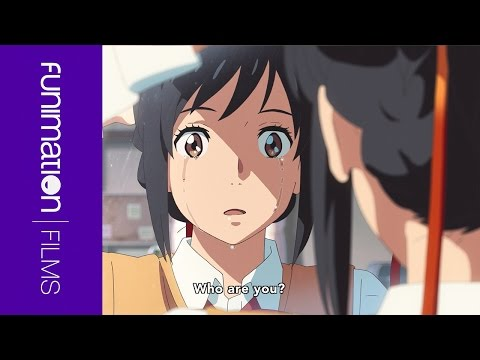

In [1]:
from IPython.display import YouTubeVideo
#Your Name
#Anime for life
YouTubeVideo('e4dZhQaTJMk')

## 4. Simpson's Rule
In class we built a simple Riemann sum integrator. The code that we wrote together is posted here:
https://github.com/Physics177-2017/Lec03-Rounding-Error

In this problem, please perform the *same* analysis on the *same* test function using **Simpson's rule**. 

What's that? Well, you'll have to read a little about it. You can find a discussion in section 5.1.2 of the course textbook (Newman, *Computational Physics*, 2nd ed.). For those who do not have a copy, you can find a discussion in Chapter 3 of Stickler's *Basic concepts in computational physics*, which is available electronically through the UCR library here: http://scotty.ucr.edu/record=b5077839~S5 (click on "Connect to: SpringerLink")

Create a cell below this one and do the following:
1. Create an "integrator" function that takes in a function and a spacing, $\Delta x$, and outputs the integral of that function from 0 .to 1 using Simpson's rule.

2. Use the same test function that we did in lecture: $$f(x) = 3.0\times 10^{-10} x^2.$$

3. Find the error on your algorithm (compared to the exact result) for $\Delta x$ of $10^{-1}, \cdots, 10^{-7}$.

4. Compare this to the errors that we found using the Riemann sum. Are they better? Worse? What happens as we approach the "$10^{-16}$" numerical precision?


In [67]:
def f(x):
    return (3.0*10**-10)*x**2
"""This is our function of x"""


'This is our function of x'

In [129]:
def integrator(f, delta_x):
    """Integrating function"""
    total = 0.0
    y = float((1))/3
    sample = 0.0
    while(sample<1):
        total = total + y*delta_x*(f(sample)+4*f(sample+delta_x)+f(sample+2*delta_x))
        sample += 2*delta_x
        
    return total



In [113]:
delta_xs = []
for i in range(1,8):
    delta_xs.append(10**-i)

In [82]:
delta_xs

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]

In [123]:
def Int_error(delta_x):
    return 10**-10 - integrator(f,delta_x)
"""this will give the precision of the solution"""

'this will give the precision of the solution'

In [130]:
list(map(Int_error,delta_xs))

[-1.2924697071141057e-26,
 -7.754818242684634e-26,
 -1.809457589959748e-25,
 -6.001200078728672e-14,
 -1.174467222854588e-22,
 -5.99999655269872e-16,
 -5.135615456520828e-21]

In [14]:
def f(x):
    return (3.0*10**-10)*x**2
"""This is our function of x"""


'This is our function of x'

In [22]:
def Int2(f,delta_x):
    """the Riemann Sum"""
    sample= delta_x / 2.0
    total=0.0
    while(sample<1):
        total += f(sample)
        sample += delta_x
    return total
        

In [17]:
def Int_error2(delta_x):
    return 10**-10 - Int2(f,delta_x)

In [18]:
delta_xs = []
for i in range(1,8):
    delta_xs.append(10**-i)

In [23]:
list(map(Int_error2, delta_xs))

[-8.974999999999997e-10,
 -9.89975000000001e-09,
 -9.989997500000015e-08,
 -9.99899997499826e-07,
 -9.99989999973116e-06,
 -9.999990000012305e-05,
 -0.000999999899707455]

The Reimann Sum is not very precise compared to Simpson's rule. The error set for the Reimann Sum gets larger for each delta x, substantially larger. But for Simpson's Rule, the error for the set is beyond what we can determine a factor; therefore the Simpson's Rule is more appropiate to use for the function.

## 5. Thinking about rounding errors

In your own words, explain what's happening in the following cell:

In [1]:
0.1+0.1+0.1 == .3

False

In [ ]:
0.1+0.1+0.1

In a new cell below this one, explain why the above result is not suprising. What happens if you sum $0.1+0.1$ and compare it to $0.2$? Explain this.

I think that 0.1 is an aproximation of itself. This means 0.1 is close to 0.1, but not exactly 0.1. If there's some approximation with the 0.1 then adding three of them results with 0.3 but with a precision where values in decimal places cannot be ignorabe.


In [66]:
0.1+0.1==0.2

True

I have only a slight idea why 0.1+0.1 is "equal" to 0.2. Well since 0.1 is approximated value, I think that two 0.1's can counter some of the little error in 0.1 where the precision of 0.2 is really close to it where the program outputs 0.2 as the result 

## X1. [Extra Credit] 

INSPIRE is a database of papers in high-energy physics, you can find it here: http://inspirehep.net

Write a script in Jupyter that takes a string and opens up a web browser with an INSPIRE search for that string.